# DMT-Assignment01-Task01-Preprocess

## Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
# read data from file
dataset = pd.read_csv("dataset_mood_smartphone.csv")
dataset

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [3]:
# because "Unnamed" seems useless, get rid of it from dataset
dataset = dataset.drop("Unnamed: 0", 1)
dataset

,id,time,variable,value
0,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...
376907,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


Text(0, 0.5, 'Data points')

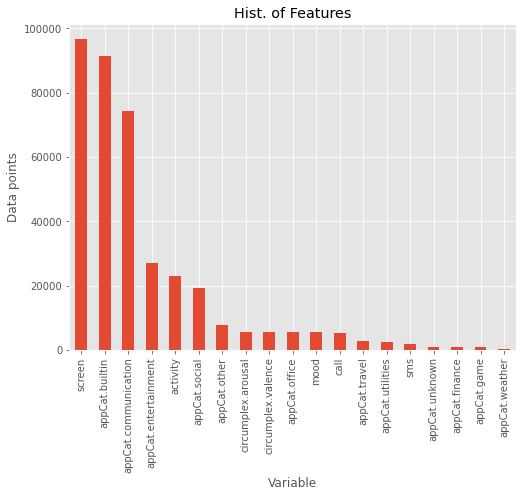

In [4]:
# visualized the dataset by counting variables
hist = pd.DataFrame(dataset.variable.value_counts()).plot(kind='bar', title="Hist. of Features", \
                                                       legend=None, figsize=(8,6))
hist.set_xlabel("Variable")
hist.set_ylabel("Data points")

In [5]:
# label ids
ids = dataset.id.unique()
ids

array(['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07',
       'AS14.08', 'AS14.09', 'AS14.12', 'AS14.13', 'AS14.14', 'AS14.15',
       'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24',
       'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28', 'AS14.29', 'AS14.30',
       'AS14.31', 'AS14.32', 'AS14.33'], dtype=object)

Text(0, 0.5, 'Data points')

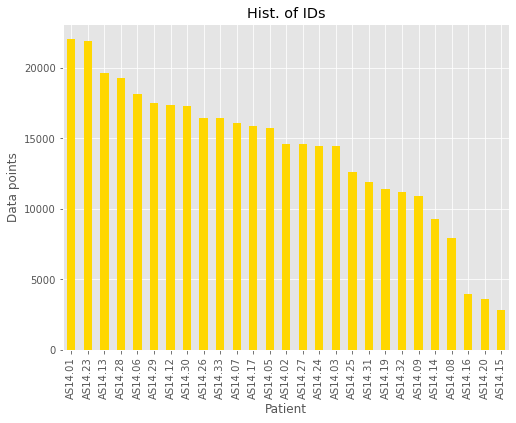

In [6]:
# visualized dataset by counting ids
hist2 = pd.DataFrame(dataset.id.value_counts()).plot(kind="bar", title="Hist. of IDs", \
                                                     legend=None, figsize=(8,6) ,color="gold")
hist2.set_xlabel("Patient")
hist2.set_ylabel("Data points")

In [7]:
# label time
dataset.loc[:,('time')] = pd.to_datetime(dataset.time)
dataset.time

0        2014-02-26 13:00:00.000
1        2014-02-26 15:00:00.000
2        2014-02-26 18:00:00.000
3        2014-02-26 21:00:00.000
4        2014-02-27 09:00:00.000
                   ...          
376907   2014-04-11 07:51:16.948
376908   2014-04-19 11:00:32.747
376909   2014-04-26 10:19:07.434
376910   2014-04-27 00:44:48.450
376911   2014-04-07 18:25:14.036
Name: time, Length: 376912, dtype: datetime64[ns]

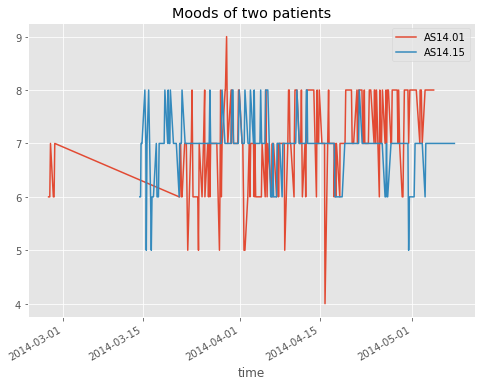

In [8]:
# visualized two patients' mood over time
fig, ax = plt.subplots()
for f, a in dataset[(dataset.id.isin(["AS14.01","AS14.15"])) \
                    & (dataset.variable=="mood")].groupby(["id"]):
    ax = a.plot(ax=ax, kind="line", x="time", y="value", label=f, \
                title="Moods of two patients", figsize=(8,6))
plt.show()

In [9]:
# removal of hr/min/sec from time, because it seems less important
date = pd.date_range(start=dataset.time.min().round('D'), end=dataset.time.max().round('D'), freq='D')
date

DatetimeIndex(['2014-02-17', '2014-02-18', '2014-02-19', '2014-02-20',
               '2014-02-21', '2014-02-22', '2014-02-23', '2014-02-24',
               '2014-02-25', '2014-02-26',
               ...
               '2014-05-31', '2014-06-01', '2014-06-02', '2014-06-03',
               '2014-06-04', '2014-06-05', '2014-06-06', '2014-06-07',
               '2014-06-08', '2014-06-09'],
              dtype='datetime64[ns]', length=113, freq='D')

## Preprocessing

In [10]:
# create an empty dataset which is labeled by ID and Date
prodataset = pd.DataFrame(np.nan,
                    index = pd.MultiIndex.from_product([dataset.id.unique(), date], names = ["ID", "Date"]),
                    columns= dataset.variable.unique())
prodataset

mood  circumplex.arousal  circumplex.valence  activity  \
ID      Date                                                                 
AS14.01 2014-02-17   NaN                 NaN                 NaN       NaN   
        2014-02-18   NaN                 NaN                 NaN       NaN   
        2014-02-19   NaN                 NaN                 NaN       NaN   
        2014-02-20   NaN                 NaN                 NaN       NaN   
        2014-02-21   NaN                 NaN                 NaN       NaN   
...                  ...                 ...                 ...       ...   
AS14.33 2014-06-05   NaN                 NaN                 NaN       NaN   
        2014-06-06   NaN                 NaN                 NaN       NaN   
        2014-06-07   NaN                 NaN                 NaN       NaN   
        2014-06-08   NaN                 NaN                 NaN       NaN   
        2014-06-09   NaN                 NaN                 NaN       NaN   

                    screen  call  sms  appCat.builtin  appCat.communication  \
ID      Date                                                                  
AS14.01 2014-02-17     NaN   NaN  NaN             NaN                   NaN   
        2014-02-18     NaN   NaN  NaN             NaN                   NaN   
        2014-02-19     NaN   NaN  NaN             NaN                   NaN   
        2014-02-20     NaN   NaN  NaN             NaN                   NaN   
        2014-02-21     NaN   NaN  NaN             NaN                   NaN   
...                    ...   ...  ...             ...                   ...   
AS14.33 2014-06-05     NaN   NaN  NaN             NaN                   NaN   
        2014-06-06     NaN   NaN  NaN             NaN                   NaN   
        2014-06-07     NaN   NaN  NaN             NaN                   NaN   
        2014-06-08     NaN   NaN  NaN             NaN                   NaN   
        2014-06-09     NaN   NaN  NaN             NaN                   NaN   

                    appCat.entertainment  appCat.finance  appCat.game  \
ID      Date                                                            
AS14.01 2014-02-17                   NaN             NaN          NaN   
        2014-02-18                   NaN             NaN          NaN   
        2014-02-19                   NaN             NaN          NaN   
        2014-02-20                   NaN             NaN          NaN   
        2014-02-21                   NaN             NaN          NaN   
...                                  ...             ...          ...   
AS14.33 2014-06-05                   NaN             NaN          NaN   
        2014-06-06                   NaN             NaN          NaN   
        2014-06-07                   NaN             NaN          NaN   
        2014-06-08                   NaN             NaN          NaN   
        2014-06-09                   NaN             NaN          NaN   

                    appCat.office  appCat.other  appCat.social  appCat.travel  \
ID      Date                                                                    
AS14.01 2014-02-17            NaN           NaN            NaN            NaN   
        2014-02-18            NaN           NaN            NaN            NaN   
        2014-02-19            NaN           NaN            NaN            NaN   
        2014-02-20            NaN           NaN            NaN            NaN   
        2014-02-21            NaN           NaN            NaN            NaN   
...                           ...           ...            ...            ...   
AS14.33 2014-06-05            NaN           NaN            NaN            NaN   
        2014-06-06            NaN           NaN            NaN            NaN   
        2014-06-07            NaN           NaN            NaN            NaN   
        2014-06-08            NaN           NaN            NaN            NaN   
        2014-06-09            NaN           NaN        

In [11]:
# restructured two groups of data into the new dataset
# group mood = mood, circumplex.arousal, circumplex.valence
# group rest = rest of variables
for id in ids:
    usedID = dataset[dataset.id == id]
    usedID.index = usedID.time
    
    for mood in dataset.variable.unique()[0:3]:
        subdataset = usedID[usedID.variable == mood].value.resample("D").mean()
        usedate = np.array(subdataset.index.strftime("%Y-%m-%d"))
        for day in usedate:
            prodataset.loc[id, mood].loc[day] = subdataset[day]
    
    for rest in dataset.variable.unique()[3:]:
        subdataset = usedID[usedID.variable == rest].value.resample("D").sum()
        usedate = np.array(subdataset.index.strftime("%Y-%m-%d"))
        for day in usedate:
            prodataset.loc[id, mood].loc[day] = subdataset[day]

prodataset.head() 

mood  circumplex.arousal  circumplex.valence  activity  \
ID      Date                                                                 
AS14.01 2014-02-17   NaN                 NaN                 2.0       NaN   
        2014-02-18   NaN                 NaN                 1.0       NaN   
        2014-02-19   NaN                 NaN                 2.0       NaN   
        2014-02-20   NaN                 NaN                 3.0       NaN   
        2014-02-21   NaN                 NaN                 1.0       NaN   

                    screen  call  sms  appCat.builtin  appCat.communication  \
ID      Date                                                                  
AS14.01 2014-02-17     NaN   NaN  NaN             NaN                   NaN   
        2014-02-18     NaN   NaN  NaN             NaN                   NaN   
        2014-02-19     NaN   NaN  NaN             NaN                   NaN   
        2014-02-20     NaN   NaN  NaN             NaN                   NaN   
        2014-02-21     NaN   NaN  NaN             NaN                   NaN   

                    appCat.entertainment  appCat.finance  appCat.game  \
ID      Date                                                            
AS14.01 2014-02-17                   NaN             NaN          NaN   
        2014-02-18                   NaN             NaN          NaN   
        2014-02-19                   NaN             NaN          NaN   
        2014-02-20                   NaN             NaN          NaN   
        2014-02-21                   NaN             NaN          NaN   

                    appCat.office  appCat.other  appCat.social  appCat.travel  \
ID      Date                                                                    
AS14.01 2014-02-17            NaN           NaN            NaN            NaN   
        2014-02-18            NaN           NaN            NaN            NaN   
        2014-02-19            NaN           NaN            NaN            NaN   
        2014-02-20            NaN           NaN            NaN            NaN   
        2014-02-21            NaN           NaN            NaN            NaN   

                    appCat.unknown  appCat.utilities  appCat.weather  
ID      Date                                                          
AS14.01 2014-02-17             NaN               NaN             NaN  
        2014-02-18             NaN               NaN             NaN  
        2014-02-19             NaN               NaN             NaN  
        2014-02-20             NaN               NaN             NaN  
        2014-02-21             NaN               NaN             NaN

In [12]:
# create an instance-based dataset as fig.2 with t
prodataset["t"] = np.nan
cnt = 0
for id in ids:
    cntDay = 0
    for day in date:
        cntDay += 1
        prodataset["t"][cnt] = cntDay
        cnt += 1

prodataset.head()

mood  circumplex.arousal  circumplex.valence  activity  \
ID      Date                                                                 
AS14.01 2014-02-17   NaN                 NaN                 2.0       NaN   
        2014-02-18   NaN                 NaN                 1.0       NaN   
        2014-02-19   NaN                 NaN                 2.0       NaN   
        2014-02-20   NaN                 NaN                 3.0       NaN   
        2014-02-21   NaN                 NaN                 1.0       NaN   

                    screen  call  sms  appCat.builtin  appCat.communication  \
ID      Date                                                                  
AS14.01 2014-02-17     NaN   NaN  NaN             NaN                   NaN   
        2014-02-18     NaN   NaN  NaN             NaN                   NaN   
        2014-02-19     NaN   NaN  NaN             NaN                   NaN   
        2014-02-20     NaN   NaN  NaN             NaN                   NaN   
        2014-02-21     NaN   NaN  NaN             NaN                   NaN   

                    appCat.entertainment  appCat.finance  appCat.game  \
ID      Date                                                            
AS14.01 2014-02-17                   NaN             NaN          NaN   
        2014-02-18                   NaN             NaN          NaN   
        2014-02-19                   NaN             NaN          NaN   
        2014-02-20                   NaN             NaN          NaN   
        2014-02-21                   NaN             NaN          NaN   

                    appCat.office  appCat.other  appCat.social  appCat.travel  \
ID      Date                                                                    
AS14.01 2014-02-17            NaN           NaN            NaN            NaN   
        2014-02-18            NaN           NaN            NaN            NaN   
        2014-02-19            NaN           NaN            NaN            NaN   
        2014-02-20            NaN           NaN            NaN            NaN   
        2014-02-21            NaN           NaN            NaN            NaN   

                    appCat.unknown  appCat.utilities  appCat.weather    t  
ID      Date                                                               
AS14.01 2014-02-17             NaN               NaN             NaN  1.0  
        2014-02-18             NaN               NaN             NaN  2.0  
        2014-02-19             NaN               NaN             NaN  3.0  
        2014-02-20             NaN               NaN             NaN  4.0  
        2014-02-21             NaN               NaN             NaN  5.0

In [13]:
# assignd values into the new dataset
for id in ids:
    cnt = 0
    lst = list()
    
    for day in np.array(date.strftime("%Y-%m-%d")):
        if np.isnan(prodataset.loc[id, "mood"][day]):
            cnt += 1
            lst.append(day)
            
            if day == np.array(date.strftime("%Y-%m-%d"))[-1]:
                for index in lst:
                    prodataset = prodataset.drop((id, index))
                lst = []
                cnt = 0
                
        else:
            if cnt > 2:
                for index in lst:
                    prodataset = prodataset.drop((id, index))
            lst = []
            cnt = 0
            
prodataset.to_csv("dataset_mood.csv")

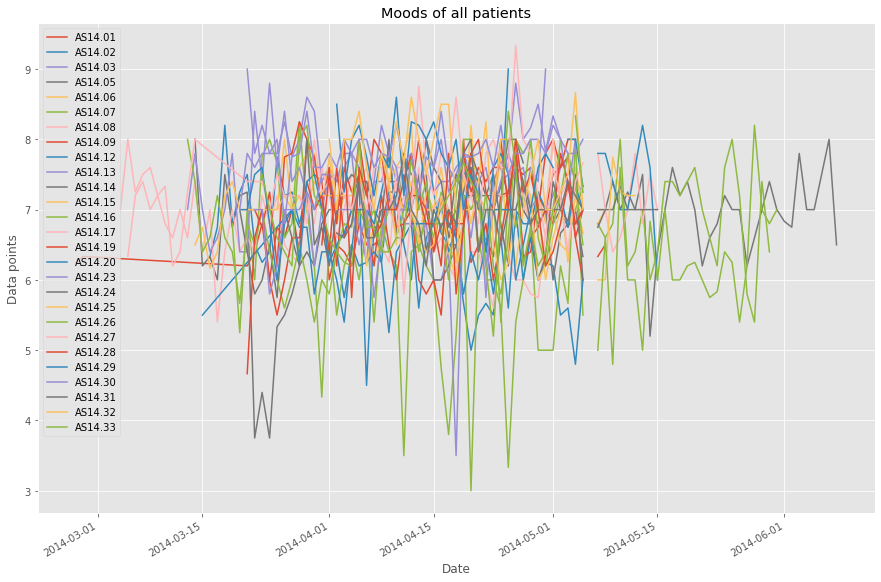

In [14]:
# visualized moods of all patients over the time
plt.rcParams["figure.figsize"] = [15,10]
for patient in prodataset.index.levels[0]:
    prodataset.loc[patient]['mood'].plot(label=patient, title="Moods of all patients", ylabel="Data points")
plt.legend();